I will create a code which will recognize numbers

In [3]:
# prompt: Import required libraries for code which will recognize hand written numbers

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


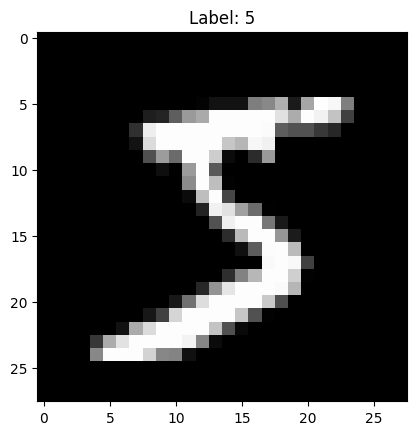

In [4]:
# prompt: Import some publicly available set of images which can be used for training model recognizing the hand written numbers

from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Example: Display the first image in the training set
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

In [5]:
# prompt: Create a model using keras which will have 4 layers and will be used to recognize the hand written number. train the model with set imported above

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense

# Define the model
model = keras.Sequential([
    Flatten(input_shape=(28, 28)),  # Input layer (flattens the 28x28 images)
    Dense(128, activation='relu'),  # Hidden layer 1
    Dense(64, activation='relu'),   # Hidden layer 2
    Dense(32, activation='relu'),   # Hidden layer 3
    Dense(10, activation='softmax') # Output layer (10 classes for digits 0-9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5) # Adjust the number of epochs as needed

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8622 - loss: 0.4611
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9667 - loss: 0.1087
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9786 - loss: 0.0694
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9825 - loss: 0.0561
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9859 - loss: 0.0433
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9652 - loss: 0.1194
Test Loss: 0.102902352809906
Test Accuracy: 0.9704999923706055


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8709 - loss: 0.4422
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9679 - loss: 0.1056
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9783 - loss: 0.0690
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9823 - loss: 0.0583
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9853 - loss: 0.0451
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9676 - loss: 0.1083
Test Loss: 0.09482156485319138
Test Accuracy: 0.9718000292778015
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


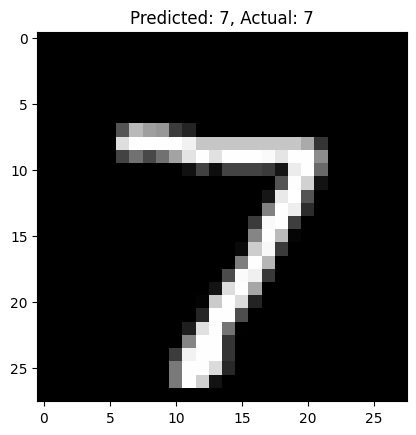

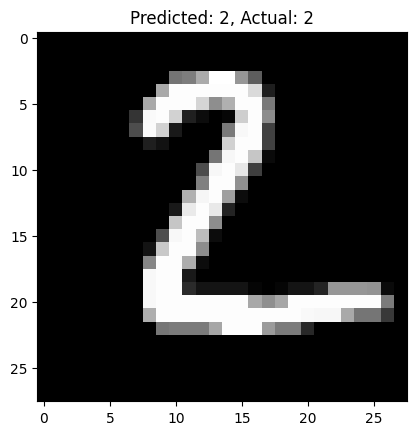

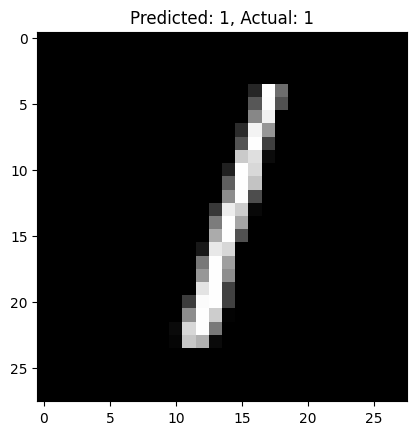

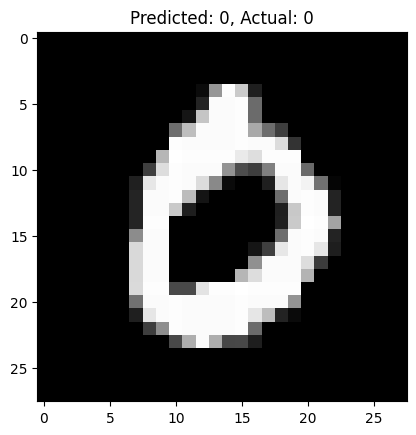

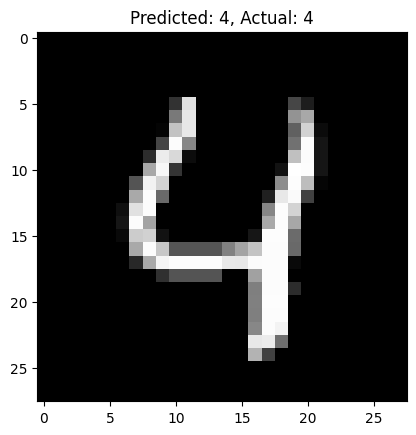

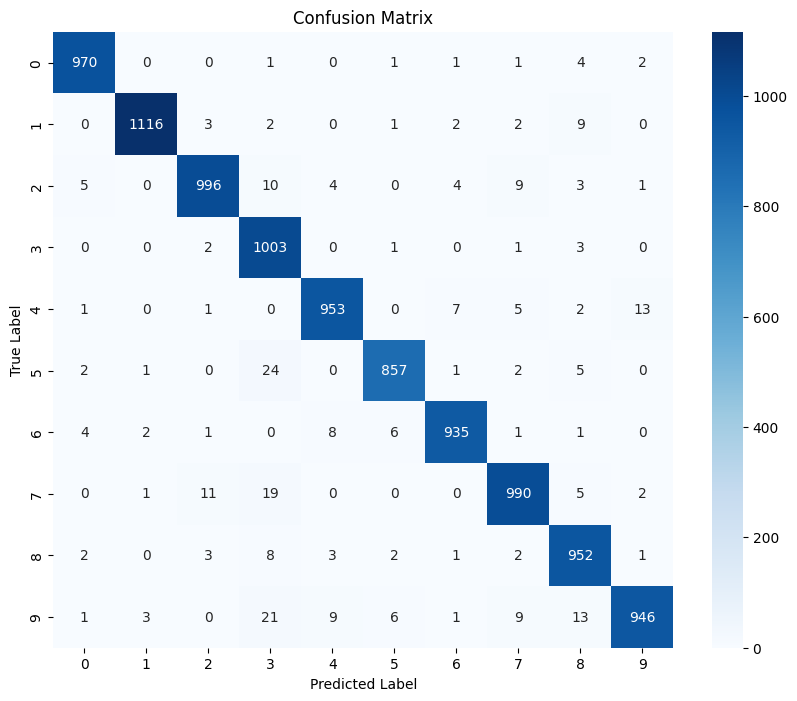

In [7]:
# prompt: Test the code, show few examples of the testing, draw the confusion matrix

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the model (same as before)
model = keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Make predictions
y_pred = np.argmax(model.predict(x_test), axis=1)

# Display some examples
for i in range(5):  # Display the first 5 images
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}")
    plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

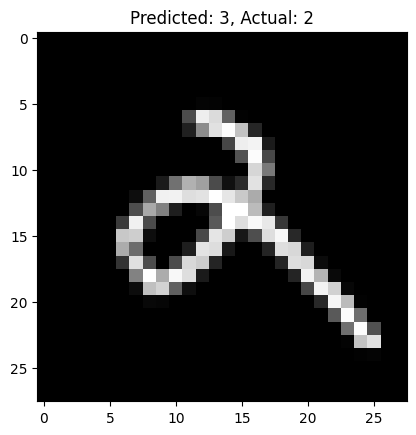

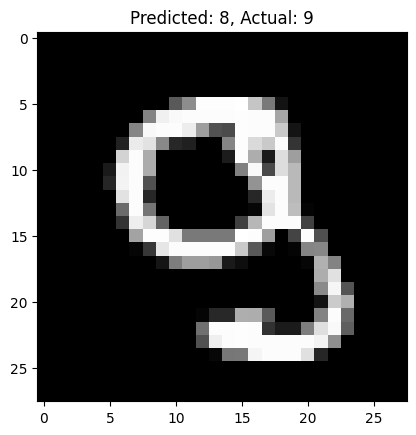

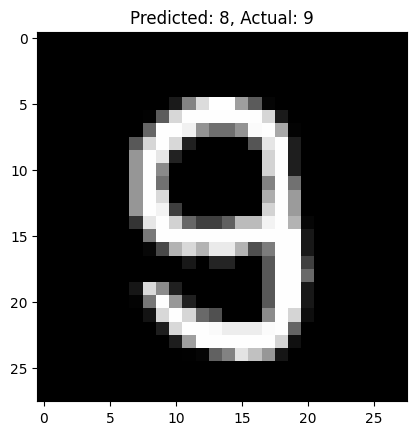

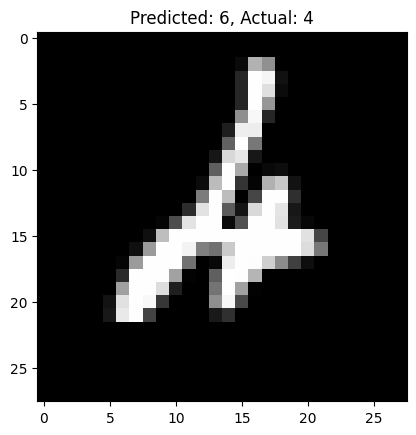

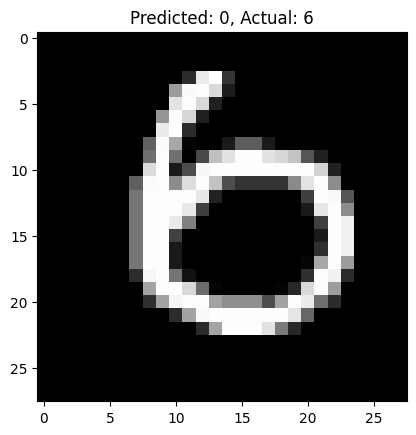

In [9]:
# prompt: list some examples where model failed to recognize the number. Don't retrain the model

# Get the indices where the predictions are incorrect
misclassified_indices = np.where(y_pred != y_test)[0]

# Display the first 5 misclassified examples
num_examples_to_display = 5
for i in range(min(num_examples_to_display, len(misclassified_indices))):
    index = misclassified_indices[i]
    plt.imshow(x_test[index], cmap='gray')
    plt.title(f"Predicted: {y_pred[index]}, Actual: {y_test[index]}")
    plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7954 - loss: 0.6380 - val_accuracy: 0.9648 - val_loss: 0.1163
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9475 - loss: 0.1797 - val_accuracy: 0.9758 - val_loss: 0.0859
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9572 - loss: 0.1415 - val_accuracy: 0.9703 - val_loss: 0.0971
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9626 - loss: 0.1241 - val_accuracy: 0.9772 - val_loss: 0.0763
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9689 - loss: 0.1022 - val_accuracy: 0.9787 - val_loss: 0.0775
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9694 - loss: 0.0942 - val_accuracy: 0.9790 - val_loss: 0.0784
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9734 - loss: 0.0857 - val_accuracy: 0.9818 - val_loss: 0.0659
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9737 - loss: 0.08

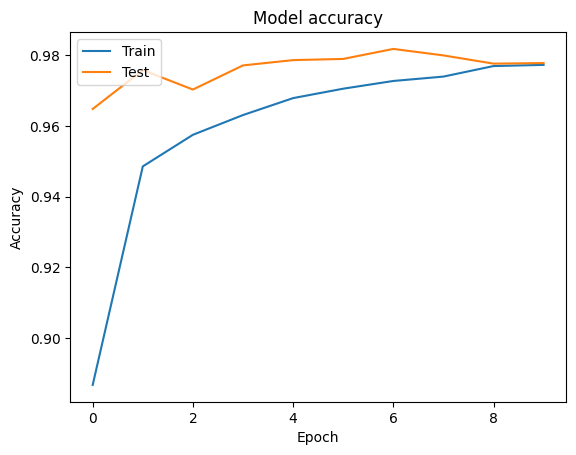

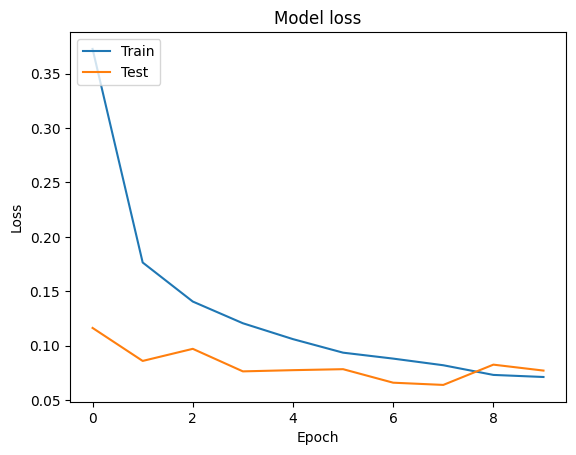

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


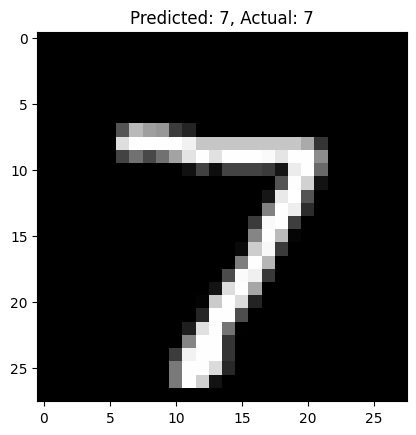

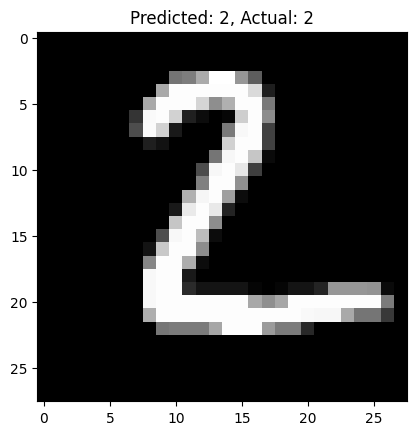

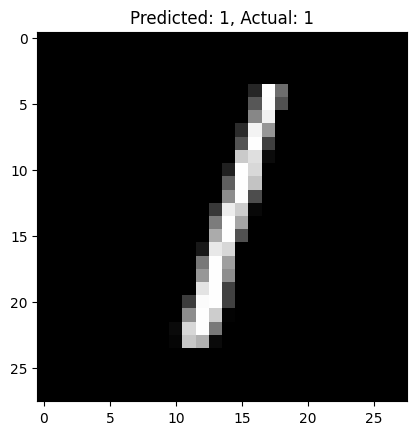

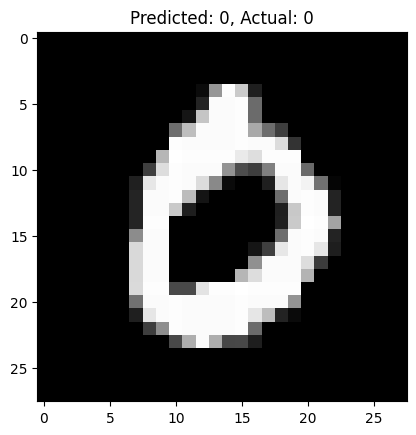

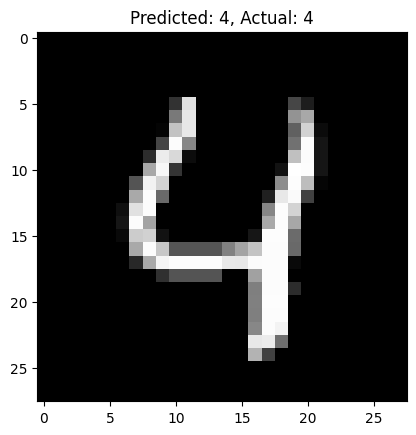

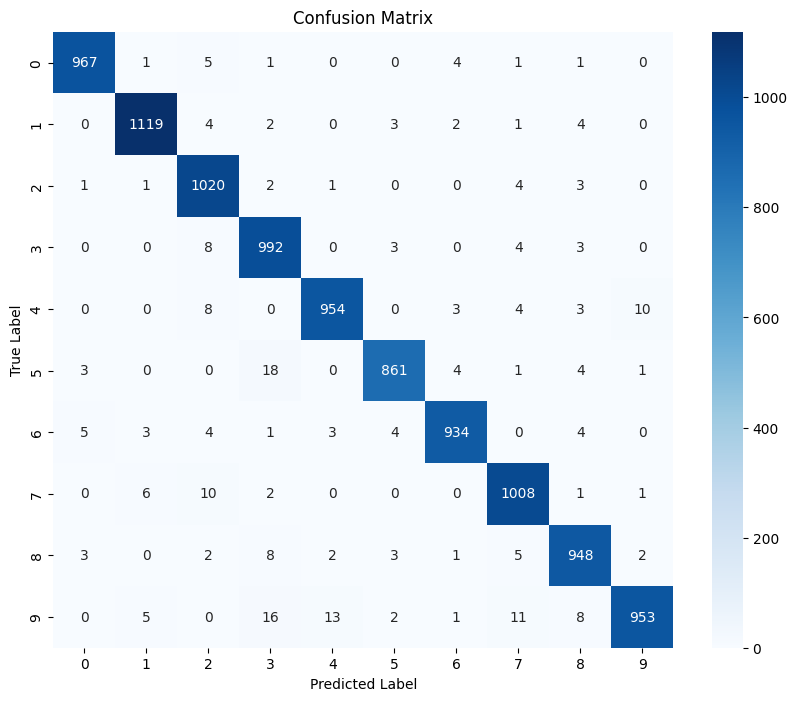

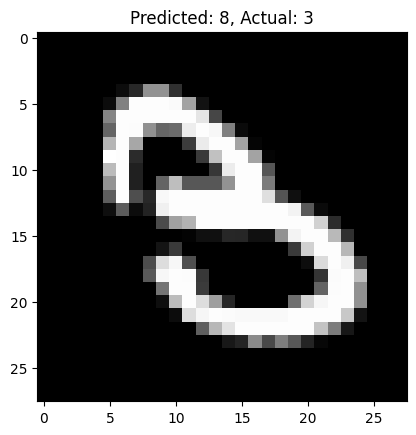

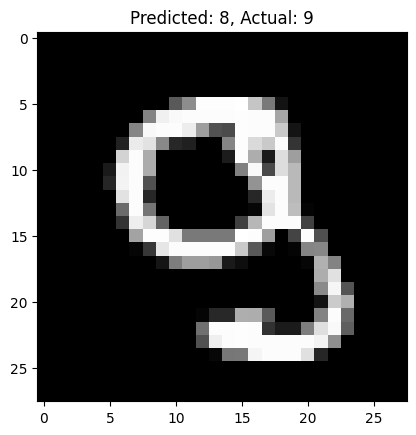

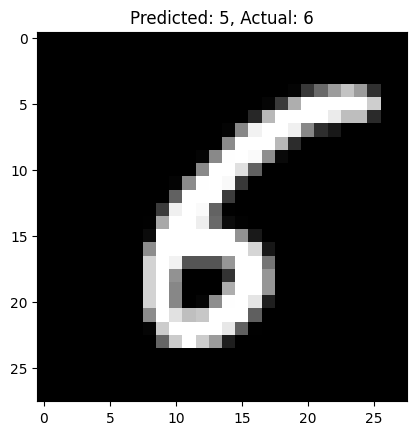

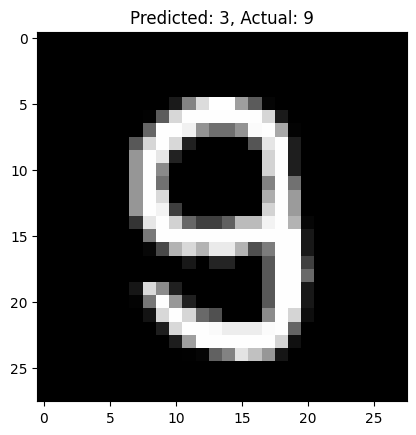

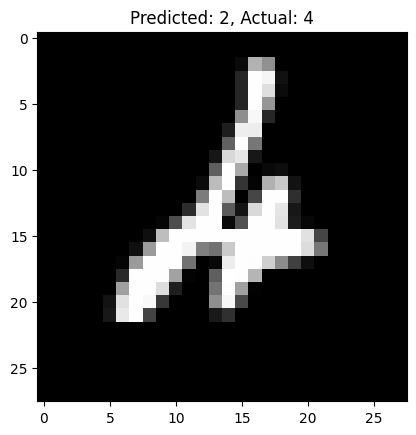

In [11]:
# prompt: Improve the model

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the model with improvements: Dropout for regularization
model = keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.2),  # Add dropout layer
    Dense(64, activation='relu'),
    Dropout(0.2),  # Add dropout layer
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model with a different optimizer (AdamW)
model.compile(optimizer='adam', # Or try 'adamw'
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with more epochs and a validation split
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1) # Increased epochs

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Make predictions
y_pred = np.argmax(model.predict(x_test), axis=1)

# Display some examples (first 5)
for i in range(5):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}")
    plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Display misclassified examples
misclassified_indices = np.where(y_pred != y_test)[0]
num_examples_to_display = 5
for i in range(min(num_examples_to_display, len(misclassified_indices))):
    index = misclassified_indices[i]
    plt.imshow(x_test[index], cmap='gray')
    plt.title(f"Predicted: {y_pred[index]}, Actual: {y_test[index]}")
    plt.show()